In [1]:
import numpy as np 
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib

from torch.utils.data import DataLoader
import torch
import sklearn.preprocessing as skp



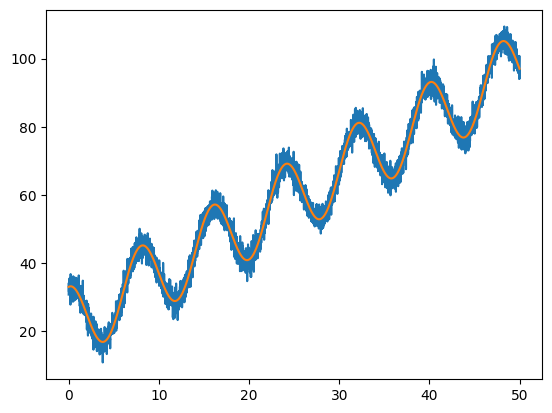

In [2]:


x = np.arange(0,50.01, 0.01)
a = 11; b = np.pi/4; c = 1.5; d = 22
y = a*np.cos(b*x) + c* x + d

n = len(y)
noise = np.random.randn(n)
ynoise = y+2*noise
plt.plot(x,ynoise,x,y)

plt.show()

xorig = np.arange(0,50.01, 0.01)
yorig = a*np.cos(b*xorig) + c* xorig + d


<Figure size 640x480 with 0 Axes>

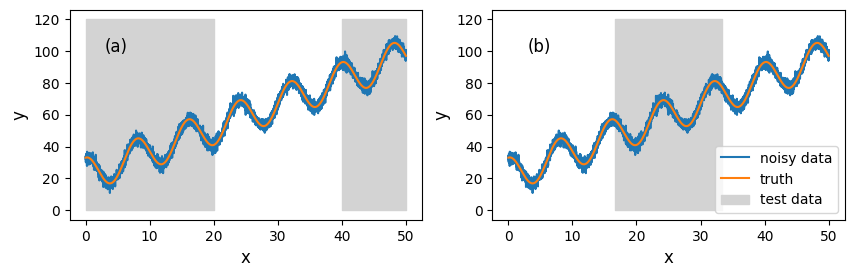

In [3]:

fig = plt.figure()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(221)

plt.plot(x,ynoise, label='noisy data')
plt.plot(x,y, label='truth')

x_region = [0, 20]  # x values for the region
y_min = [0, 0]     # y values for the lower boundary of the region
y_max = [120, 120]    # y values for the upper boundary of the region


# Fill the region between y_min and y_max
plt.fill_between(x_region, y_min, y_max, color='lightgray')

x_region = [40, 50]  # x values for the region
y_min = [0, 0]     # y values for the lower boundary of the region
y_max = [120, 120]    # y values for the upper boundary of the region

# Fill the region between y_min and y_max
plt.fill_between(x_region, y_min, y_max, color='lightgray')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.annotate('(a)', xy=(0.5, -0.05), xytext=(0.1, 0.8), textcoords='axes fraction',fontsize=12)


ax = fig.add_subplot(222)

plt.plot(x,ynoise, label='noisy data')
plt.plot(x,y, label='truth')


x_region = [16.7, 33.4]  # x values for the region
y_min = [0, 0]     # y values for the lower boundary of the region
y_max = [120, 120]    # y values for the upper boundary of the region

# Fill the region between y_min and y_max
plt.fill_between(x_region, y_min, y_max, color='lightgray', label='test data')
plt.legend(loc='lower right')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.annotate('(b)', xy=(0.5, -0.05), xytext=(0.1, 0.8), textcoords='axes fraction',fontsize=12)

plt.show()
#plt.savefig('nn_curve1.eps', format='eps', bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2.0516317188057522


<Figure size 640x480 with 0 Axes>

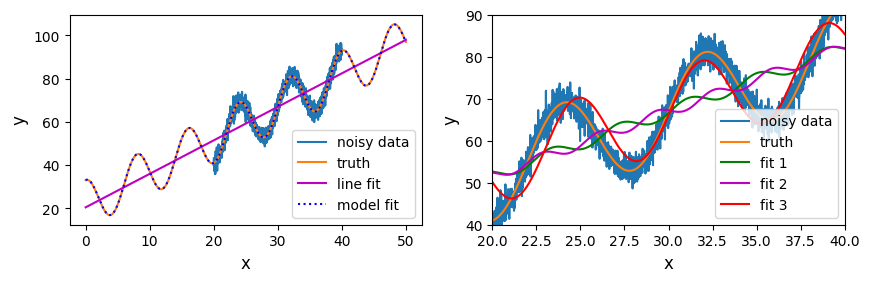

In [4]:
xt = x[2000:4000]
yn = ynoise[2000:4000]

fig = plt.figure()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(221)


plt.plot(xt,yn, label='noisy data')
plt.plot(x,y, label='truth')

pcoeff = np.polyfit(xt, yn, 1)
yp = np.polyval(pcoeff, x)
plt.plot(x, yp,'m', label='line fit')

def cosinefit(c, x, y):
    e = np.sum((c[0]*np.cos(c[1]*x)+c[2]*x+c[3]-y)**2)
    return e

c0 = np.array([10, 1*np.pi/4, 5/3, 20])   

res= opt.minimize(cosinefit, c0, args=(xt, yn), method='Nelder-Mead')
c = res.x
yfit2 = (c[0]*np.cos(c[1]*x)+c[2]*x+c[3])

e2 = np.sqrt(np.sum((c[0]*np.cos(c[1]*xt)+c[2]*xt+c[3]-yn)**2)/2000)
print(e2)

plt.plot(x,yfit2, 'b:', label='model fit')

plt.legend(loc='lower right')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.annotate('(a)', xy=(0.5, -0.05), xytext=(0.1, 0.8), textcoords='axes fraction',fontsize=12)



# 10 pi/4 5/3 20
# 3 pi/4 2/3 32
# 3 2pi/4 2/3 32
# 3 2pi/4 3/3 32

#fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(222)

plt.plot(xt,yn, label='noisy data')
plt.plot(x,y, label='truth')

c0 = np.array([10, 2*np.pi/4, 5/3, 20])   
res= opt.minimize(cosinefit, c0, args=(xt, yn), method='Nelder-Mead')
c = res.x
yfit_model = (c[0]*np.cos(c[1]*x)+c[2]*x+c[3])
plt.plot(x,yfit_model,'g', label='fit 1')

c0 = np.array([3, 3*np.pi/4, 2/3, 32])   
res= opt.minimize(cosinefit, c0, args=(xt, yn), method='Nelder-Mead')
c = res.x
yfit_model = (c[0]*np.cos(c[1]*x)+c[2]*x+c[3])
plt.plot(x,yfit_model,'m', label='fit 2')

c0 = np.array([3, 3*np.pi/4, 1/3, 15])   
res= opt.minimize(cosinefit, c0, args=(xt, yn), method='Nelder-Mead')
c = res.x
yfit_model = (c[0]*np.cos(c[1]*x)+c[2]*x+c[3])
plt.plot(x,yfit_model,'r', label='fit 3')

plt.xlim([20, 40])
plt.ylim([40,90])
plt.legend(loc='lower right')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.annotate('(b)', xy=(0.5, -0.05), xytext=(0.1, 0.8), textcoords='axes fraction',fontsize=12)


plt.savefig('nn_curve2.eps', format='eps', bbox_inches='tight')
plt.show()



In [5]:

# Min max scaling can help with some of the numerical things we were talking about
sc = skp.MinMaxScaler()
xt = x[2000:4000].reshape(-1,1)
yn = ynoise[2000:4000].reshape(-1,1)
xt = sc.fit_transform(xt)
sc2 = skp.MinMaxScaler()
yt = sc2.fit_transform(yn)
xt = torch.tensor(xt).to(torch.float32)
yt = torch.tensor(yt).to(torch.float32)

class TimeSeriesDataset(torch.utils.data.Dataset):
    '''Takes input sequence of sensor measurements with shape (batch size, lags, num_sensors)
    and subsequent measurement, return Torch dataset'''
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.len = X.shape[0]
        
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
    
    def __len__(self):
        return self.len
train_dataset = TimeSeriesDataset(xt,yt)

In [6]:
# example build of feed forward neural network
class FNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer3 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer4 = torch.nn.Linear(hidden_size, output_size)
        self.elu = torch.nn.ELU()
        self.relu = torch.nn.ReLU()

    def forward(self, z):
        z = self.layer1(z)
        z = self.elu(z)
        z = self.layer2(z)
        z = self.elu(z)
        z = self.layer3(z)
        z = self.elu(z)
        z = self.layer4(z)

        return z


## A slightly more flexible definition of a neural network that takes num_layers, hidden_size, and activation as arguments
class CustomFNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, activation):
        super(CustomFNN, self).__init__()
        self.layers = torch.nn.ModuleList()
        self.layers.append(torch.nn.Linear(input_size, hidden_size))
        for _ in range(num_layers - 1):
            self.layers.append(torch.nn.Linear(hidden_size, hidden_size))
        self.layers.append(torch.nn.Linear(hidden_size, output_size))
        
        if activation == 'relu':
            self.activation = torch.nn.ReLU()
        elif activation == 'elu':
            self.activation = torch.nn.ELU()
        else:
            raise ValueError("Invalid activation function")
        
    def forward(self, z):
        for layer in self.layers[:-1]:
            z = layer(z)
            z = self.activation(z)
        z = self.layers[-1](z)
        return z


In [7]:
## Decreased the number of neurons in the hidden layer to 30 (from 300)
# model = FNN(1,30,1)
# train_loader = DataLoader(train_dataset, batch_size=64)

## For more flexibility, use the CustomFNN class
model = CustomFNN(1, 30, 1, 3, 'elu')
train_loader = DataLoader(train_dataset, batch_size=64)

In [8]:
## Decreased learning rate to 1e-3 (from 1e-4)
lr = 1e-3; epochs = 5000
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.MSELoss()
for epoch in range(epochs):
    
    for _, data in enumerate(train_loader):
        model.train()
        
        outputs = model(data[0])
        optimizer.zero_grad()

        loss = criterion(outputs, data[1])
        loss.backward()
        optimizer.step()
    
    if epoch % 100 == 0:
        print(epoch)
        print(loss.item())

0
0.07671686261892319
100
0.049067433923482895
200
0.04235674440860748
300
0.03740011528134346
400
0.03455197066068649
500
0.03207596391439438
600
0.030615657567977905
700
0.030833091586828232
800
0.031058283522725105
900
0.035460129380226135
1000
0.039576634764671326
1100
0.03547118604183197
1200
0.04480697587132454
1300
0.042430195957422256
1400
0.045198023319244385
1500
0.03868267685174942
1600
0.02785540372133255
1700
0.005451816134154797
1800
0.003663300070911646
1900
0.001352776656858623
2000
0.05201650410890579
2100
0.007387345656752586
2200
0.007384904660284519
2300
0.006366853602230549
2400
0.003090690355747938
2500
0.0020723578054457903
2600
0.004632427357137203
2700
0.004022435750812292
2800
0.0013362955069169402
2900
0.00414632260799408
3000
0.011608533561229706
3100
0.002570229582488537
3200
0.001072216429747641
3300
0.0034429430961608887
3400
0.005660903174430132
3500
0.0032369999680668116
3600
0.008390842005610466
3700
0.000946496264077723
3800
0.004587522242218256
3900


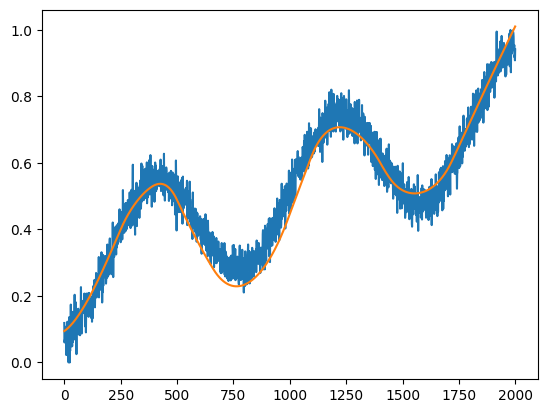

In [9]:
outs = model(train_dataset.X)
plt.plot(train_dataset.Y[:,0].detach().numpy())
plt.plot(outs[:,0].detach().numpy())

In [10]:
temp_out = train_dataset.Y.detach().numpy()
scaled_temp_out = sc2.inverse_transform(temp_out)

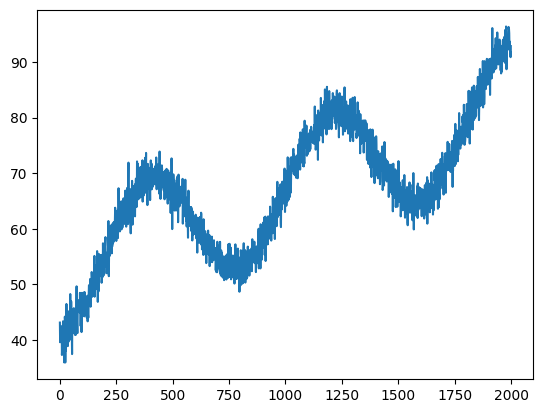

In [11]:
plt.plot(scaled_temp_out[:,0])

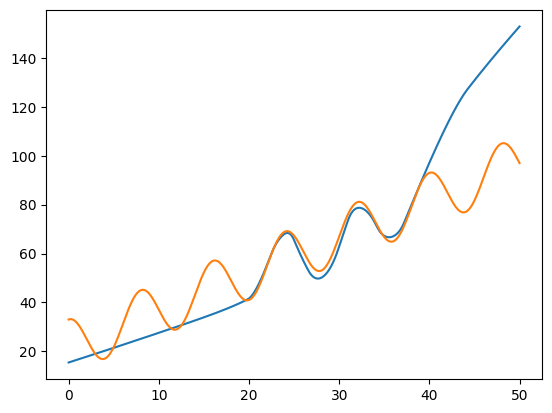

In [12]:
transformed_x_test = sc.transform(x.reshape(-1,1))
test_out = model(torch.tensor(transformed_x_test).to(torch.float32))

ytemp = test_out[:,0].detach().numpy()
y1extra = sc2.inverse_transform(ytemp.reshape(-1,1))
                          
plt.plot(xorig,y1extra)
plt.plot(xorig,yorig)



In [13]:
# Split the input data into training and testing sets

x = np.arange(0,50.01, 0.01)
a = 11
b = np.pi/4
c = 1.5
d = 22
y = a*np.cos(b*x) + c* x + d
n = len(y)
noise = np.random.randn(n)
e=2 
yn = y+e*noise


# Set the learning rate and number of epochs
lr = 1e-3
epochs = 2000
layer_width = 50
num_layers = 5
act_func = 'relu'
batch_size = 64

# middle third as test, first and last third as training
sc = skp.MinMaxScaler()
x = x.reshape(-1,1)
yn = yn.reshape(-1,1)
x = sc.fit_transform(x)
sc2 = skp.MinMaxScaler()
yn = sc2.fit_transform(yn)
x = torch.tensor(x).to(torch.float32)
yn = torch.tensor(yn).to(torch.float32)

train_xt = torch.concatenate([x[int(2*len(x)/3):],  x[:int(len(x)/3)]])
train_yt = torch.concatenate([yn[int(2*len(yn)/3):], yn[:int(len(yn)/3)]  ])
test_xt = x[int(len(x)/3):int(2*len(x)/3)]
test_yt = yn[int(len(yn)/3):int(2*len(yn)/3)]

# Create the training and testing datasets
train_dataset = TimeSeriesDataset(train_xt, train_yt)
test_dataset = TimeSeriesDataset(test_xt, test_yt)

# Create the training and testing data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create the model
model = CustomFNN(1, layer_width, 1, num_layers, act_func)


In [14]:

# Create the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.MSELoss()

# Train the model
for epoch in range(epochs):
    for _, data in enumerate(train_loader):
        model.train()
        outputs = model(data[0])
        optimizer.zero_grad()
        loss = criterion(outputs, data[1])
        loss.backward()
        optimizer.step()
    
    if epoch % 100 == 0:
        print('epoch :', epoch)
        print('train loss: ', loss.item())
        # compute loss on test set
        print('test loss: ', criterion(model(test_dataset.X), test_dataset.Y).item())
        print('............')



epoch : 0
train loss:  0.038280460983514786
test loss:  0.010955115780234337
............
epoch : 100
train loss:  0.005411176010966301
test loss:  0.013523976318538189
............
epoch : 200
train loss:  0.0005122296861372888
test loss:  0.010062659159302711
............
epoch : 300
train loss:  0.0008439054363407195
test loss:  0.010713648051023483
............
epoch : 400
train loss:  0.00047552419709973037
test loss:  0.013623475097119808
............
epoch : 500
train loss:  0.000304170825984329
test loss:  0.014450578950345516
............
epoch : 600
train loss:  0.0008507843594998121
test loss:  0.01263272576034069
............
epoch : 700
train loss:  0.00035034093889407814
test loss:  0.01233056839555502
............
epoch : 800
train loss:  0.0002352491719648242
test loss:  0.015384583733975887
............
epoch : 900
train loss:  0.00044980086386203766
test loss:  0.010989868082106113
............
epoch : 1000
train loss:  0.0002815279585774988
test loss:  0.020192256197

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

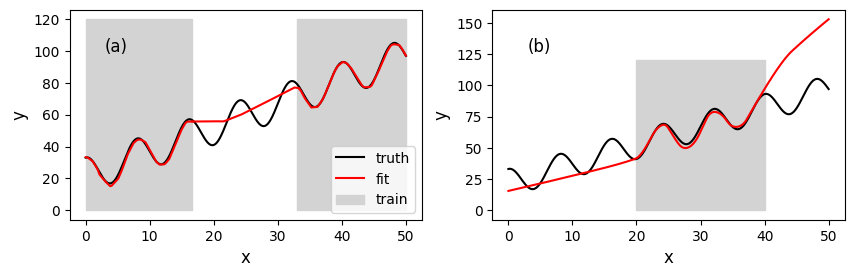

In [15]:

fig = plt.figure()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(221)

train_out = model(train_dataset.X)
test_out = model(test_dataset.X)

ytemp = test_out[:,0].detach().numpy()
ytemp2 = train_out[:,0].detach().numpy()
y1intra = sc2.inverse_transform(ytemp.reshape(-1,1))
y2intra = sc2.inverse_transform(ytemp2.reshape(-1,1))

plt.plot(xorig,yorig,'k', label='truth')
plt.plot(xorig[1667:3334],y1intra,'r', label='fit')
plt.plot(xorig[:1667],y2intra[1667:],'r')
plt.plot(xorig[3335:],y2intra[:1666],'r')

x_region = [0, 16.6]  # x values for the region
y_min = [0, 0]     # y values for the lower boundary of the region
y_max = [120, 120]    # y values for the upper boundary of the region
plt.fill_between(x_region, y_min, y_max, color='lightgray')

x_region = [33, 50]  # x values for the region
y_min = [0, 0]     # y values for the lower boundary of the region
y_max = [120, 120]    # y values for the upper boundary of the region

# Fill the region between y_min and y_max
plt.fill_between(x_region, y_min, y_max, color='lightgray',label='train')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.annotate('(a)', xy=(0.5, -0.05), xytext=(0.1, 0.8), textcoords='axes fraction',fontsize=12)

plt.legend(loc='lower right')

ax = fig.add_subplot(222)
plt.plot(xorig,yorig,'k')
plt.plot(xorig,y1extra,'r')

x_region = [20, 40]  # x values for the region
y_min = [0, 0]     # y values for the lower boundary of the region
y_max = [120, 120]    # y values for the upper boundary of the region

# Fill the region between y_min and y_max
plt.fill_between(x_region, y_min, y_max, color='lightgray',label='train')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.annotate('(b)', xy=(0.5, -0.05), xytext=(0.1, 0.8), textcoords='axes fraction',fontsize=12)


plt.savefig('nn_curve3.eps', format='eps', bbox_inches='tight')
plt.show()


In [16]:
#np.save('y1intra_3.npy', y1intra)
#np.save('y2intra_3.npy', y2intra)
#np.save('y1extra_3.npy', y1extra)

